# <center> **Probability Plots y Kolmogorov-Smirnov Test** </center>
## <font size=4> **Aprendizaje Estadístico 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np
import scipy.stats as sps
from scipy.signal import correlate

import statsmodels.api as st
import matplotlib.pyplot as plt
import seaborn as sns
#import pylab as pl

from warnings import filterwarnings
filterwarnings('ignore')

# Probability-Plots

In [2]:
data = sps.norm.rvs(loc=20, scale=2.5, size=500)

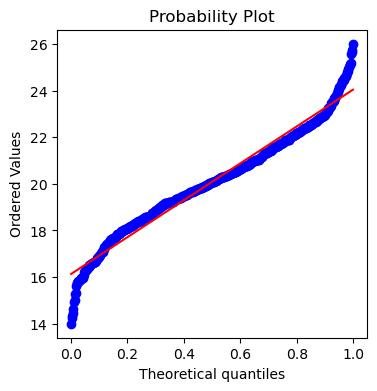

In [3]:
plt.figure(figsize=(4,4))
sps.probplot(data, dist='uniform', plot=plt)
plt.show()

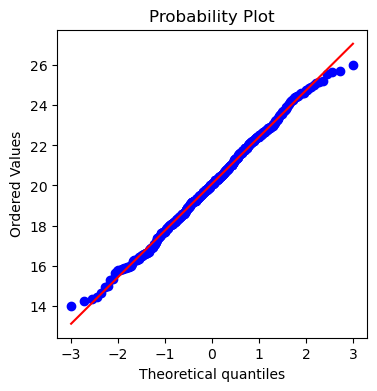

In [4]:
plt.figure(figsize=(4,4))
sps.probplot(data, dist='norm', plot=plt)
plt.show()

In [5]:
data = np.random.normal(loc=20, scale=3.5, size=5000)

In [6]:
mean = data.mean()
std = data.std()

print('mean =', mean)
print('std  =', std)

mean = 20.056251989271562
std  = 3.4572555159298815


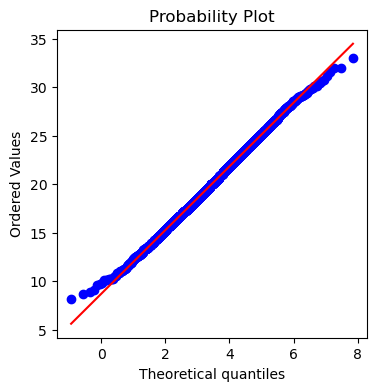

In [7]:
plt.figure(figsize=(4,4))
sps.probplot(data, sparams=(mean, std), dist='t', plot=plt)
plt.show()

In [8]:
#data2 = np.random.beta(1., 2., size=5000)
data2 = np.random.beta(2., 1., size=100)

In [9]:
data3 = np.random.beta(1., 2., size=100)

## Contraste de dos muestra (Kolmogorov-Smirnov)

In [10]:
sps.kstest(data2, data3)

KstestResult(statistic=0.56, pvalue=8.771130313572204e-15, statistic_location=0.5951142423042268, statistic_sign=-1)

In [11]:
data4 = np.random.beta(1.9, 1.05, size=100)

In [12]:
sps.kstest(data2, data4)

KstestResult(statistic=0.17, pvalue=0.11119526053829192, statistic_location=0.5730308463672633, statistic_sign=-1)

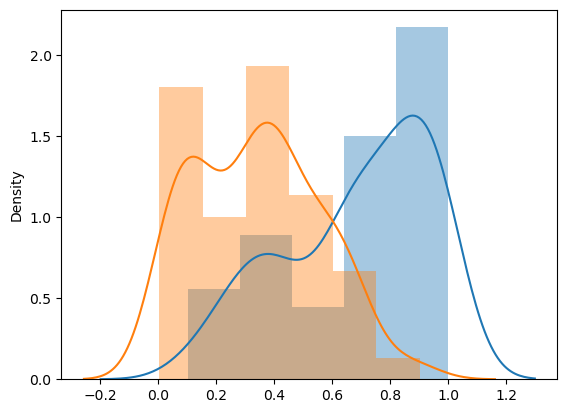

In [13]:
plt.figure()
sns.distplot(data2, kde=True)
sns.distplot(data3, kde=True)
plt.show()

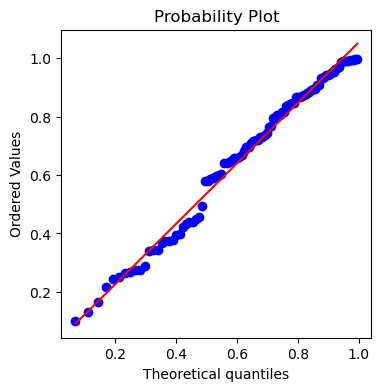

In [14]:
plt.figure(figsize=(4,4))
sps.probplot(data2, sparams=(1.9, 1.05), dist='beta', plot=plt)
plt.show()

## Fitting a distribution

In [15]:
dist = sps.beta

In [16]:
# Encontrar los parámetros óptimos de la distribución
params = dist.fit(data2)

In [17]:
print(params)

(1.2900746827891063, 0.6689178216408285, 0.012082150927213986, 0.9869588653320152)


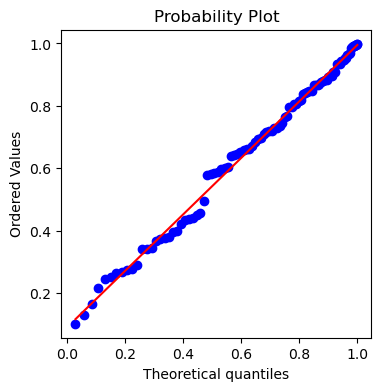

In [18]:
plt.figure(figsize=(4,4))
sps.probplot(data2, sparams=(params[0], params[1]), dist='beta', plot=plt)
plt.show()

# Set de Gráficas

In [19]:
data1 = np.random.beta(1.0, 1.5, size=5000)
data2 = np.random.beta(1.5, 1.0, size=5000)

In [20]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

In [21]:
def compare_dist(d1, d2, size=1000):
    data1 = d1.rvs(size=size)
    data2 = d2.rvs(size=size)
    
    x1, y1 = ecdf(data1)
    x1 = np.insert(x1, 0, x1[0])
    y1 = np.insert(y1, 0, 0.)
    x2, y2 = ecdf(data2)
    x2 = np.insert(x2, 0, x2[0])
    y2 = np.insert(y2, 0, 0.)
   
    plt.figure(figsize=(10, 10))
    
    # Density Functions DF
    plt.subplot(2,2,1)
    sns.kdeplot(data1, bw_method=0.5, label='dist1')
    sns.kdeplot(data2, bw_method=0.5, label='dist2')
    plt.title('Density Plot')
    
    # Distribution Functions CDF
    plt.subplot(2,2,2)
    plt.plot(x1, y1, drawstyle='steps-post')
    plt.plot(x2, y2, drawstyle='steps-post')
    plt.grid(True)
    plt.title('CDF Plot')
    
    # QQ-plot
    plt.subplot(2,2,3)
    qqs = np.linspace(0., 1., 1001)[:-1]
    qq1 = np.quantile(data1, qqs)
    qq2 = np.quantile(data2, qqs)
    minq = min(qq1.min(), qq2.min())
    maxq = max(qq1.max(), qq2.max())
    plt.plot([minq,maxq], [minq,maxq], 'r-', lw=2)
    plt.plot(qq1, qq2, 'b.', drawstyle='steps-post')
    plt.grid(True)
    plt.title('QQ-Plot')
    plt.xlabel('Dist1 Quantiles')
    plt.ylabel('Dist2 Quantiles') 
    
    # PP-plot
    plt.subplot(2,2,4)
    #sps.probplot(data1, dist=d2, plot=plt)
    minp = min(x1.min(), x2.min())
    maxp = max(x1.max(), x2.max())
    plt.plot([minp,maxp], [minp,maxp], 'r-', lw=2)
    plt.plot(x1, x2, 'b.', drawstyle='steps-post')
    plt.grid(True)
    plt.title('Probabillity Plot')
    plt.xlabel('Dist1 Probabilities')
    plt.ylabel('Dist2 Probabilities') 

    plt.show()
    return data1, data2

In [22]:
d1 = sps.norm(loc=0., scale=3.)
d2 = sps.norm(loc=10., scale=5.)

In [23]:
#d1 = sps.norm(loc=5., scale=6.)
#d2 = sps.norm(loc=6., scale=5.)

In [24]:
#d1 = sps.beta(2., 1.)
#d2 = sps.beta(1., 2.)

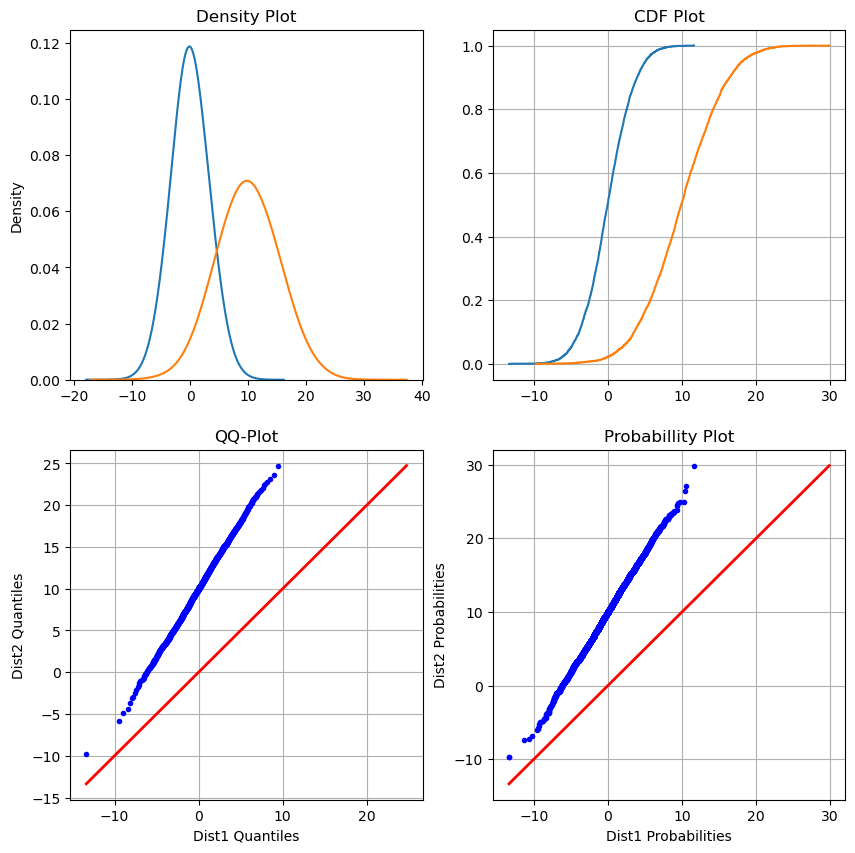

In [25]:
data1, data2 = compare_dist(d1, d2, size=5000)

In [26]:
def ks_statistics(data1, data2):
    h1 = data1.ravel()
    h2 = data2.ravel()
    N = 1000
    
    x1, y1 = ecdf(data1)
    x1 = np.insert(x1, 0, x1[0])
    y1 = np.insert(y1, 0, 0.)
    x2, y2 = ecdf(data2)
    x2 = np.insert(x2, 0, x2[0])
    y2 = np.insert(y2, 0, 0.)
   

    m = len(h1)
    n = len(h2)
    hh1 = np.histogram(h1, bins=np.linspace(0, 1, N+1), density=True)
    hh2 = np.histogram(h2, bins=np.linspace(0, 1, N+1), density=True)
    hy1 = hh1[0].cumsum() / N
    hy2 = hh2[0].cumsum() / N
    filt = np.ones(15) / 15.
    
    dens1 = sps.kde.gaussian_kde(data1)
    dens2 = sps.kde.gaussian_kde(data2)
    
    opt = np.argmax(np.abs(hy1-hy2))
    ks = np.abs(hy1-hy2)[opt]
    cut = opt / N
    
    minn = min(data1.min(), data2.min())
    maxx = max(data1.max(), data2.max())
    x = np.linspace(minn, maxx, 1000) 
    maxz = np.abs(dens1(x) - dens2(x))[100:-100].min()
    argz = np.argmin(np.abs(dens1(x) - dens2(x))[100:-100])
    hcut = dens1(x)[100 + argz]
    dcut = x[100 + argz]
    
    ksfig = plt.figure(figsize=(10, 4.5))
    plt.subplot(1,2,1)
    plt.title('KS Distance = {}'.format(ks))
    plt.xlabel('Threshold')
    plt.plot(hh1[1][1:], hy1, lw=2, label='Dist1')
    plt.plot(hh2[1][1:], hy2, lw=2, label='Dist2')
    plt.vlines(cut, ymin=0.02, ymax=0.98, color='black', lw=2)
    plt.vlines(cut, ymin=hy1[opt], ymax=hy2[opt], color='red', lw=4)
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title('KS Optimal place = {}'.format(cut))
    plt.xlabel('Threshold')
    plt.plot(x, dens1(x), label='Dist1')
    plt.plot(x, dens2(x), label='Dist2')
    plt.vlines(dcut, ymin=0., ymax=hcut, color='black', lw=2)
    plt.legend()
    plt.plot()
    return ks, cut, dcut

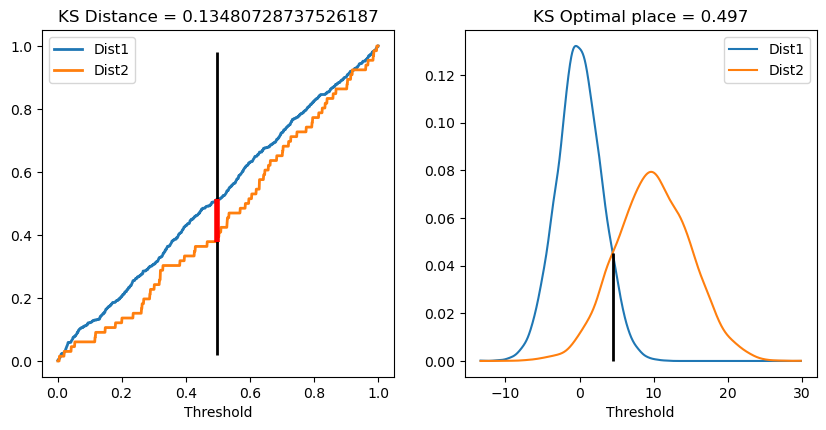

In [27]:
ks, cut, dcut = ks_statistics(data1, data2)

In [28]:
ks

0.13480728737526187

In [29]:
sps.ks_2samp(data1, data2, alternative='two-sided')

KstestResult(statistic=0.789, pvalue=0.0, statistic_location=4.57868144347484, statistic_sign=1)

In [30]:
sps.kstest(data1, data2)

KstestResult(statistic=0.789, pvalue=0.0, statistic_location=4.57868144347484, statistic_sign=1)

In [31]:
dens1 = sps.kde.gaussian_kde(data1)
dens2 = sps.kde.gaussian_kde(data2)

minn = min(data1.min(), data2.min())
maxx = max(data1.max(), data2.max())
x = np.linspace(minn, maxx, 1000) 
maxz = np.abs(dens1(x) - dens2(x))[100:-100].min()
argz = np.argmin(np.abs(dens1(x) - dens2(x))[100:-100])
dcut = x[argz]

In [32]:
x[100 + argz]

4.471195947771301

In [33]:
argz

312